In [ ]:
! pip install jcopml

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 22.5 MB/s eta 0:00:00
  Created wheel for jcopml: filename=jcopml-1.2.7-py2.py3-none-any.whl size=45916 sha256=efabe3c52e5663d7f293fda780e937dbdf12c3d3feef15d49b2d87cff1b638eb
  Stored in directory: /root/.cache/pip/wheels/1b/f0/69/8cd4944dd9637953ab744056b5faa32617cd4de449b213e886
Successfully built jcopml


In [ ]:
from google.colab import drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif

from tqdm.auto import tqdm, trange
from jcopml.utils import save_model

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_full = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/dataset.csv')
df_full

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


#**EDA**

In [ ]:
#check missing value

df_full.isnull().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [ ]:
#dihapus karena tidak mempengaruhi genre dan merupakan identitas lagu karna nilainya unik

df = df_full

del df['Unnamed: 0']
del df['track_id']
del df['artists']
del df['album_name']
del df['track_name']
del df['popularity']
del df['explicit']

df.head()

,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,230666,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,149610,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,210826,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,201933,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,198853,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [ ]:
df.rename(columns = {'track_genre':'genre'}, inplace = True)

In [ ]:
numerical = df.select_dtypes(include=np.number).columns.tolist()
numerical

['duration_ms',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'time_signature']

In [ ]:
categorical = df.select_dtypes(exclude=np.number).columns.tolist()
categorical

['genre']

In [ ]:
df_nums = df.copy()
df_nums = df_nums[numerical]

Correlation Matrix

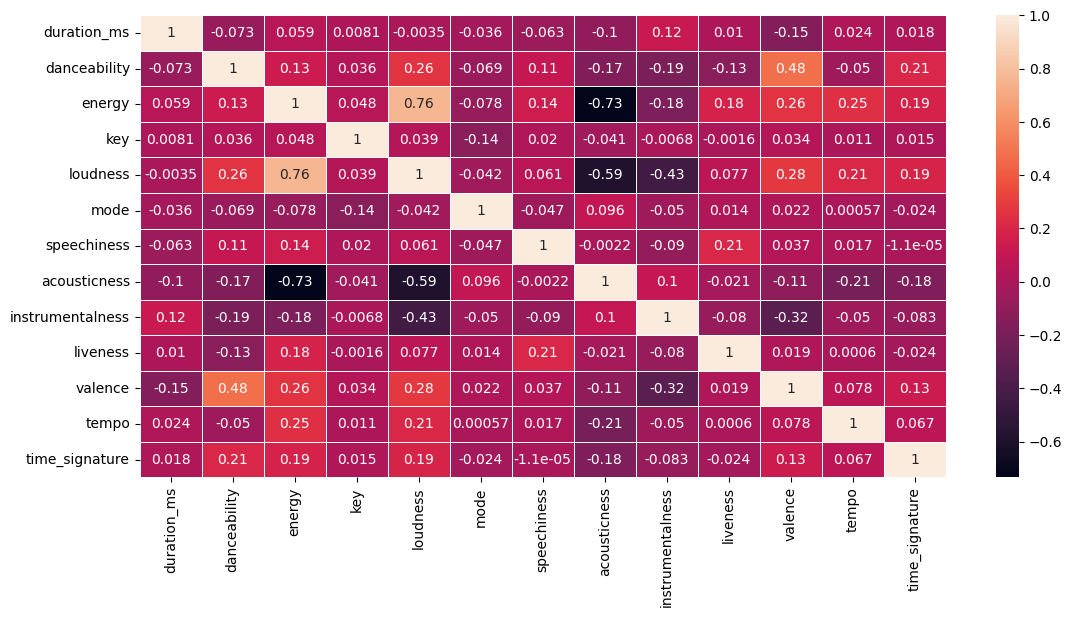

In [ ]:
plt.figure(figsize=(13,6))
corr_matrix = df_nums.corr()
sns.heatmap(corr_matrix, linewidths=.7, annot=True)
plt.show()

Energy dan Loudnes memiliki korelasi yang tinggi

#**DATA** **CLEANUP**

In [ ]:
classes = df.genre.unique()
print(classes)

['acoustic' 'afrobeat' 'alt-rock' 'alternative' 'ambient' 'anime'
 'black-metal' 'bluegrass' 'blues' 'brazil' 'breakbeat' 'british'
 'cantopop' 'chicago-house' 'children' 'chill' 'classical' 'club' 'comedy'
 'country' 'dance' 'dancehall' 'death-metal' 'deep-house' 'detroit-techno'
 'disco' 'disney' 'drum-and-bass' 'dub' 'dubstep' 'edm' 'electro'
 'electronic' 'emo' 'folk' 'forro' 'french' 'funk' 'garage' 'german'
 'gospel' 'goth' 'grindcore' 'groove' 'grunge' 'guitar' 'happy'
 'hard-rock' 'hardcore' 'hardstyle' 'heavy-metal' 'hip-hop' 'honky-tonk'
 'house' 'idm' 'indian' 'indie-pop' 'indie' 'industrial' 'iranian'
 'j-dance' 'j-idol' 'j-pop' 'j-rock' 'jazz' 'k-pop' 'kids' 'latin'
 'latino' 'malay' 'mandopop' 'metal' 'metalcore' 'minimal-techno' 'mpb'
 'new-age' 'opera' 'pagode' 'party' 'piano' 'pop-film' 'pop' 'power-pop'
 'progressive-house' 'psych-rock' 'punk-rock' 'punk' 'r-n-b' 'reggae'
 'reggaeton' 'rock-n-roll' 'rock' 'rockabilly' 'romance' 'sad' 'salsa'
 'samba' 'sertanejo' 'show

In [ ]:
#membersihkan data berdasarkan kelas
drop_genres = ['acoustic','alternative','afrobeat','alt-rock','ambient','anime','black-metal','bluegrass','blues','brazil','breakbeat','british','cantopop','chicago-house','children','chill','club','comedy','dancehall','death-metal','deep-house','detroit-techno','disney','drum-and-bass','dub','dubstep','edm','electro','emo','folk','forro','french','funk','garage','german','gospel','goth','grindcore','groove','grunge','guitar','happy','hard-rock','hardcore','hardstyle','heavy-metal','honky-tonk','idm','indian','indie-pop','indie','industrial','iranian','j-dance','j-idol','j-pop','j-rock','k-pop','kids','latin','latino','malay','mandopop','metalcore','minimal-techno','mpb','new-age','opera','pagode','party','piano','pop-film','power-pop','progressive-house','psych-rock','punk-rock','punk','reggae','reggaeton','rock-n-roll','rockabilly','romance','sad','salsa','samba','sertanejo','show-tunes','singer-songwriter','ska','sleep','songwriter','soul','spanish','study','swedish','synth-pop','tango','techno','trance','trip-hop','turkish','world-music']

In [ ]:
df.drop(df[df['genre'].isin(drop_genres)].index, inplace = True)

In [ ]:
classes = df.genre.unique()
print(classes)

['classical' 'country' 'dance' 'disco' 'electronic' 'hip-hop' 'house'
 'jazz' 'metal' 'pop' 'r-n-b' 'rock']


In [ ]:
df.reset_index(drop=True)

,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre
0,298266,0.643,0.268,11,-15.073,0,0.0900,0.5930,0.000002,0.316,0.620,143.813,4,classical
1,482586,0.484,0.898,0,-4.132,1,0.1640,0.3650,0.000000,0.091,0.680,91.975,4,classical
2,219437,0.608,0.638,11,-6.008,0,0.0292,0.5810,0.017200,0.448,0.439,140.109,4,classical
3,299146,0.695,0.293,11,-16.278,0,0.0431,0.5960,0.015800,0.132,0.637,143.804,4,classical
4,387716,0.583,0.308,7,-18.303,0,0.0465,0.5810,0.010600,0.257,0.241,118.226,4,classical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,253626,0.440,0.838,9,-6.196,1,0.0423,0.0956,0.000000,0.473,0.619,138.908,4,rock
11996,253626,0.440,0.838,9,-6.196,1,0.0423,0.0956,0.000000,0.473,0.619,138.908,4,rock
11997,253626,0.440,0.838,9,-6.196,1,0.0423,0.0956,0.000000,0.473,0.619,138.908,4,rock
11998,253626,0.440,0.838,9,-6.196,1,0.0423,0.0956,0.000000,0.473,0.619,138.908,4,rock


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12000 entries, 16000 to 91999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   duration_ms       12000 non-null  int64  
 1   danceability      12000 non-null  float64
 2   energy            12000 non-null  float64
 3   key               12000 non-null  int64  
 4   loudness          12000 non-null  float64
 5   mode              12000 non-null  int64  
 6   speechiness       12000 non-null  float64
 7   acousticness      12000 non-null  float64
 8   instrumentalness  12000 non-null  float64
 9   liveness          12000 non-null  float64
 10  valence           12000 non-null  float64
 11  tempo             12000 non-null  float64
 12  time_signature    12000 non-null  int64  
 13  genre             12000 non-null  object 
dtypes: float64(9), int64(4), object(1)
memory usage: 1.4+ MB


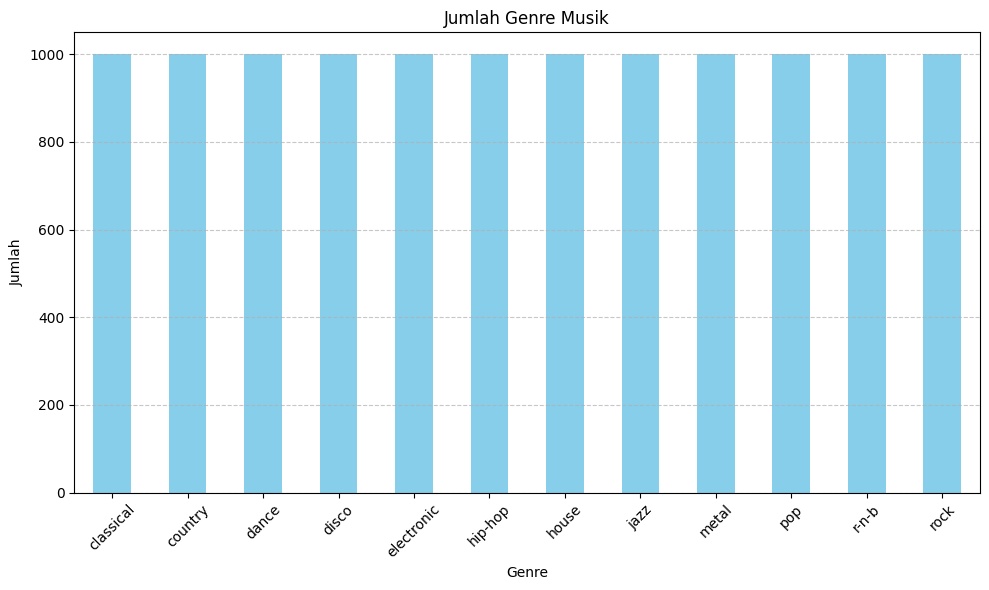

In [ ]:
# Menghitung jumlah masing-masing genre
jumlah_genre = df['genre'].value_counts()

# Membuat bar plot
plt.figure(figsize=(10, 6))
jumlah_genre.plot(kind='bar', color='skyblue')
plt.title('Jumlah Genre Musik')
plt.xlabel('Genre')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
# plt.savefig(r'/content/drive/MyDrive/Colab Notebooks/dataset/jumlah_data.jpg')
plt.show()

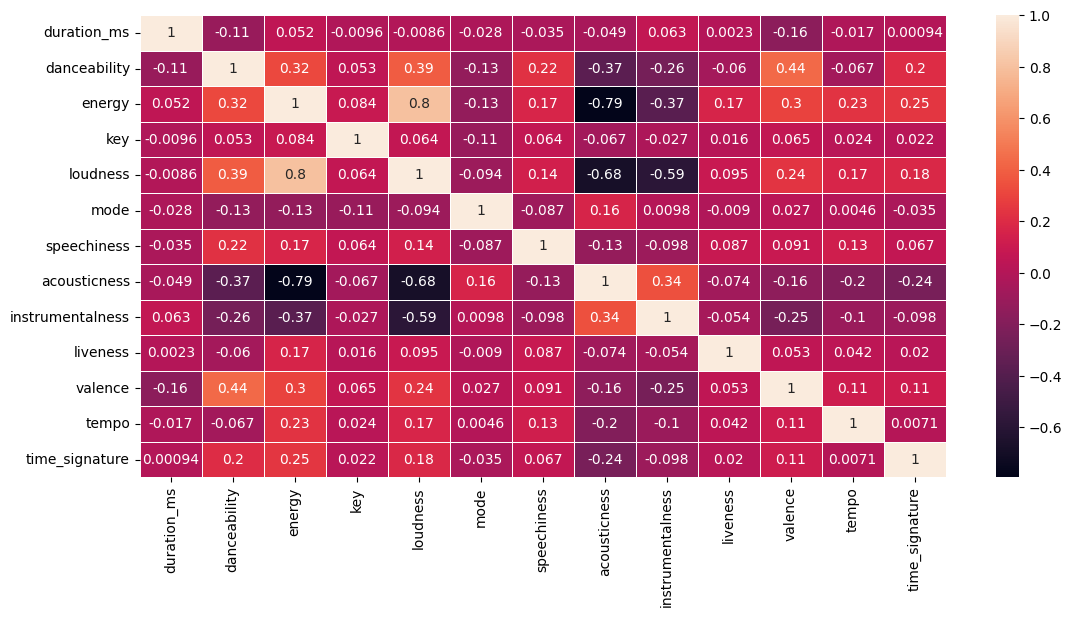

In [ ]:
df_nums = df.copy()
df_nums = df_nums[numerical]
plt.figure(figsize=(13,6))
corr_matrix = df_nums.corr()
sns.heatmap(corr_matrix, linewidths=.7, annot=True)
plt.show()

In [ ]:
#data splitting

df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [ ]:
train_genre_counts = df_train['genre'].value_counts()
print(train_genre_counts)

genre
house         621
metal         617
hip-hop       615
r-n-b         613
jazz          608
disco         602
country       601
rock          601
classical     592
pop           587
dance         587
electronic    556
Name: count, dtype: int64


In [ ]:
val_genre_counts = df_val['genre'].value_counts()
print(val_genre_counts)

genre
jazz          217
electronic    211
country       209
pop           207
disco         204
dance         203
house         201
rock          199
hip-hop       198
classical     185
metal         183
r-n-b         183
Name: count, dtype: int64


In [ ]:
test_genre_counts = df_test['genre'].value_counts()
print(test_genre_counts)

genre
electronic    233
classical     223
dance         210
pop           206
r-n-b         204
rock          200
metal         200
disco         194
country       190
hip-hop       187
house         178
jazz          175
Name: count, dtype: int64


In [ ]:
y_train = df_train.genre.values
y_val = df_val.genre.values
y_test = df_test.genre.values

del df_train['genre']
del df_val['genre']
del df_test['genre']

len(df_train), len(df_val), len(df_test)

(7200, 2400, 2400)

In [ ]:
cols = df.select_dtypes(include=np.number).columns.tolist()
cols

['duration_ms',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'time_signature']

In [ ]:
#mengubah kategorical ke numeric

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_val = le.fit_transform(y_val)
y_test = le.fit_transform(y_test)

In [ ]:
original_labels = le.classes_

print("Label-genre yang asli:", original_labels)

Label-genre yang asli: ['classical' 'country' 'dance' 'disco' 'electronic' 'hip-hop' 'house'
 'jazz' 'metal' 'pop' 'r-n-b' 'rock']


In [ ]:
#mengubah dataset dari representasi DataFrame ke representasi yang dapat digunakan oleh model machine learning, khususnya untuk model yang membutuhkan input dalam bentuk matriks.

train_dicts = df_train[cols].to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

val_dict = df_val[cols].to_dict(orient='records')
X_val = dv.transform(val_dict)

print(X_train)

[[3.20000e-01 6.79000e-01 2.46333e+05 ... 1.16269e+02 4.00000e+00
  6.79000e-01]
 [9.49000e-01 8.71000e-02 5.86080e+05 ... 8.60150e+01 4.00000e+00
  3.46000e-02]
 [3.50000e-03 6.51000e-01 1.78420e+05 ... 1.09019e+02 4.00000e+00
  4.14000e-01]
 ...
 [5.12000e-02 6.92000e-01 1.84390e+05 ... 1.22984e+02 4.00000e+00
  6.14000e-01]
 [1.86000e-02 5.77000e-01 1.80150e+05 ... 1.60036e+02 4.00000e+00
  5.43000e-01]
 [7.20000e-01 7.74000e-01 2.10466e+05 ... 1.03464e+02 4.00000e+00
  4.21000e-01]]


In [ ]:
print(X_val)

[[1.77000e-03 3.27000e-01 3.92600e+05 ... 1.25232e+02 4.00000e+00
  2.18000e-01]
 [5.84000e-01 5.06000e-01 2.16419e+05 ... 1.39912e+02 4.00000e+00
  2.21000e-01]
 [2.90000e-02 7.10000e-01 3.07014e+05 ... 1.40994e+02 4.00000e+00
  7.84000e-01]
 ...
 [5.13000e-01 4.29000e-01 2.90400e+05 ... 1.49966e+02 3.00000e+00
  7.43000e-01]
 [7.20000e-02 6.59000e-01 2.56760e+05 ... 1.22013e+02 4.00000e+00
  4.54000e-01]
 [7.40000e-04 4.49000e-01 1.67450e+05 ... 1.41900e+02 4.00000e+00
  6.94000e-01]]


#**FEATURE SELECTION**

## Univariate Feature Selection

In [ ]:
# Pilih k fitur terbaik menggunakan ANOVA
selector = SelectKBest(score_func=f_classif, k=10)  # Ganti k sesuai kebutuhan
X_selected = selector.fit_transform(X_train, y_train)

In [ ]:
# Dapatkan skor feature importance pada set pelatihan
feature_scores = selector.scores_

# Tampilkan skor fitur untuk setiap fitur pada set pelatihan
for feature, score in zip(dv.get_feature_names_out(), feature_scores):
    print(f"Feature: {feature}, Score: {score}")

Feature: acousticness, Score: 874.2342442541395
Feature: danceability, Score: 407.9110070929281
Feature: duration_ms, Score: 31.054608423734535
Feature: energy, Score: 651.8890200909747
Feature: instrumentalness, Score: 482.6167773900606
Feature: key, Score: 4.7548938946093395
Feature: liveness, Score: 22.22262916531269
Feature: loudness, Score: 864.6219462737918
Feature: mode, Score: 54.82117296466751
Feature: speechiness, Score: 81.68841348259006
Feature: tempo, Score: 27.188882675720464
Feature: time_signature, Score: 27.404249690461114
Feature: valence, Score: 79.25318043285179


In [ ]:
# Dapatkan indeks fitur yang diurutkan berdasarkan skor feature importance
sorted_feature_indices = sorted(range(len(feature_scores)), key=lambda k: feature_scores[k], reverse=True)

# Tampilkan skor fitur yang diurutkan dari yang terbesar ke terkecil
for index in sorted_feature_indices:
    feature_name = dv.get_feature_names_out()[index]
    score = feature_scores[index]
    print(f"Feature: {feature_name}, Score: {score}")

Feature: acousticness, Score: 874.2342442541395
Feature: loudness, Score: 864.6219462737918
Feature: energy, Score: 651.8890200909747
Feature: instrumentalness, Score: 482.6167773900606
Feature: danceability, Score: 407.9110070929281
Feature: speechiness, Score: 81.68841348259006
Feature: valence, Score: 79.25318043285179
Feature: mode, Score: 54.82117296466751
Feature: duration_ms, Score: 31.054608423734535
Feature: time_signature, Score: 27.404249690461114
Feature: tempo, Score: 27.188882675720464
Feature: liveness, Score: 22.22262916531269
Feature: key, Score: 4.7548938946093395


In [ ]:
# rf = RandomForestClassifier(random_state=1)
# rf.fit(X_train, y_train)

In [ ]:
del df['tempo']
del df['liveness']
del df['key']

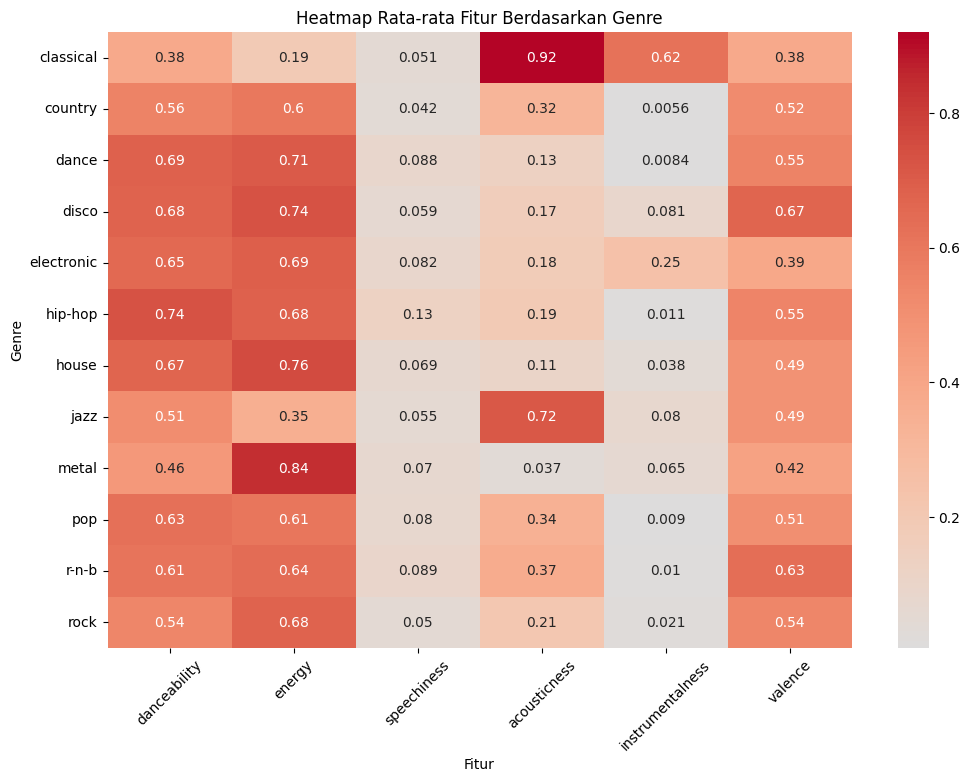

In [ ]:
# Memilih beberapa fitur yang diinginkan
selected_features = ['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness','valence']

# Menghitung rata-rata fitur yang dipilih berdasarkan genre
genre_means = df.groupby('genre')[selected_features].mean()

# Membuat heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(genre_means, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap Rata-rata Fitur Berdasarkan Genre')
plt.xlabel('Fitur')
plt.ylabel('Genre')
plt.xticks(rotation=45)
plt.savefig(r'/content/drive/MyDrive/Colab Notebooks/dataset/heatmap.jpg')
plt.show()

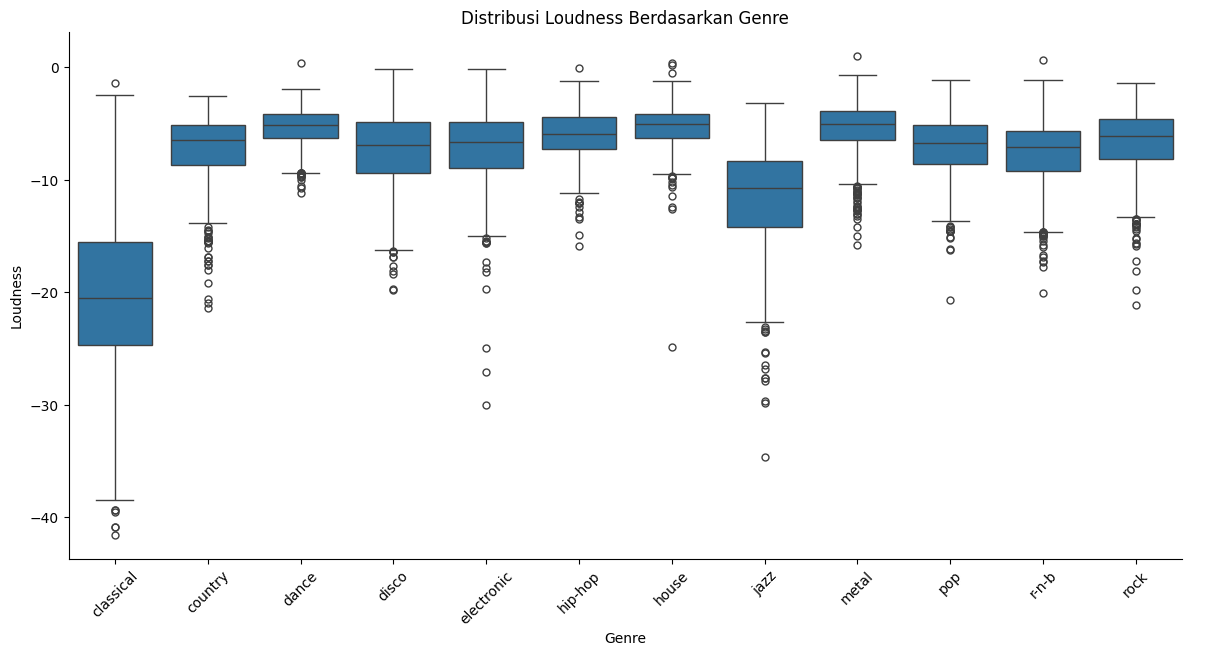

In [ ]:
sns.catplot(x='genre', y='loudness', kind='box', data=df, height=6, aspect=2)
plt.title('Distribusi Loudness Berdasarkan Genre')
plt.xlabel('Genre')
plt.ylabel('Loudness')
plt.xticks(rotation=45)
plt.savefig(r'/content/drive/MyDrive/Colab Notebooks/dataset/heatmap_loudness.jpg')
plt.show()

In [ ]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.genre.values
y_val = df_val.genre.values
y_test = df_test.genre.values

del df_train['genre']
del df_val['genre']
del df_test['genre']

len(df_train), len(df_val), len(df_test)

(7200, 2400, 2400)

In [ ]:
cols = df.select_dtypes(include=np.number).columns.tolist()
cols

['duration_ms',
 'danceability',
 'energy',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'valence',
 'time_signature']

In [ ]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_val = le.fit_transform(y_val)
y_test = le.fit_transform(y_test)

In [ ]:
train_dicts = df_train[cols].to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

val_dict = df_val[cols].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [ ]:
model = RandomForestClassifier(random_state=1)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [ ]:
#menggunakan pendekatan ovr

y_pred = model.predict_proba(X_val)
roc_auc_score(y_val, y_pred, multi_class='ovr')

0.909491421651341

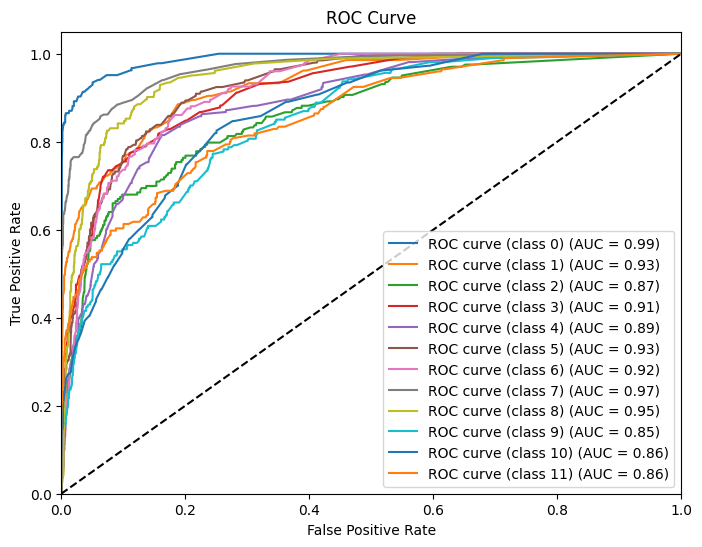

Mean ROC AUC Score: 0.909491421651341


In [ ]:
# Menghitung kurva ROC untuk setiap kelas
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(12):
    fpr[i], tpr[i], _ = roc_curve(y_val == i, y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot kurva ROC untuk setiap kelas
plt.figure(figsize=(8, 6))
for i in range(12):
    plt.plot(fpr[i], tpr[i], label='ROC curve (class {}) (AUC = {:.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
# plt.savefig(r'/content/drive/MyDrive/Colab Notebooks/dataset/roc_sebelum.jpg')
plt.show()

mean_roc_auc = np.mean(list(roc_auc.values()))
print("Mean ROC AUC Score:", mean_roc_auc)

## Hyperparameter Tuning

In [ ]:
scores = []

for d in tqdm([5, 10, 15, 20 ]):
    for n in trange(10, 201, 10):
        model = RandomForestClassifier(n_estimators=n,
                                    max_depth=d,
                                    random_state=1)
        model.fit(X_train, y_train)

        y_pred = model.predict_proba(X_val)
        auc = roc_auc_score(y_val, y_pred, multi_class='ovr')

        scores.append((d, n, auc))

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

In [ ]:
columns = ['max_depth', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

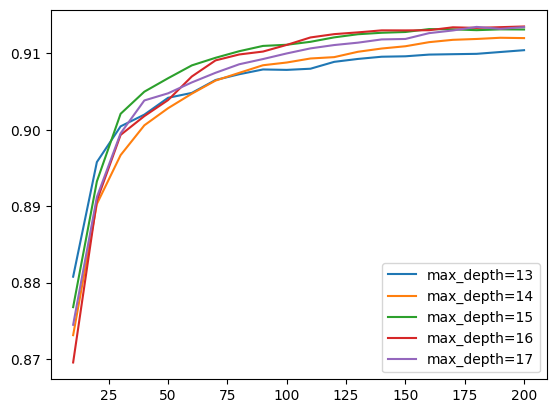

In [ ]:
for d in [5, 10, 15, 20 ]:
    df_subset = df_scores[df_scores.max_depth == d]

    plt.plot(df_subset.n_estimators, df_subset.auc,
             label='max_depth=%d' % d)

plt.legend()

In [ ]:
# Mencetak seluruh nilai n yang dihasilkan beserta AUC-nya
for d, n, auc in scores:
    print(f"max_depth: {d}, n_estimators: {n}, AUC: {auc:.4f}")

# Untuk mencetak hasil terbaik
best_params = max(scores, key=lambda x: x[2])
print(f"Best max_depth: {best_params[0]}, Best n_estimators: {best_params[1]}, Best ROC AUC Score: {best_params[2]:.4f}")

max_depth: 5, n_estimators: 10, AUC: 0.8223
max_depth: 5, n_estimators: 20, AUC: 0.8318
max_depth: 5, n_estimators: 30, AUC: 0.8344
max_depth: 5, n_estimators: 40, AUC: 0.8340
max_depth: 5, n_estimators: 50, AUC: 0.8337
max_depth: 5, n_estimators: 60, AUC: 0.8350
max_depth: 5, n_estimators: 70, AUC: 0.8352
max_depth: 5, n_estimators: 80, AUC: 0.8358
max_depth: 5, n_estimators: 90, AUC: 0.8357
max_depth: 5, n_estimators: 100, AUC: 0.8359
max_depth: 5, n_estimators: 110, AUC: 0.8366
max_depth: 5, n_estimators: 120, AUC: 0.8364
max_depth: 5, n_estimators: 130, AUC: 0.8360
max_depth: 5, n_estimators: 140, AUC: 0.8361
max_depth: 5, n_estimators: 150, AUC: 0.8369
max_depth: 5, n_estimators: 160, AUC: 0.8370
max_depth: 5, n_estimators: 170, AUC: 0.8369
max_depth: 5, n_estimators: 180, AUC: 0.8368
max_depth: 5, n_estimators: 190, AUC: 0.8369
max_depth: 5, n_estimators: 200, AUC: 0.8373
max_depth: 10, n_estimators: 10, AUC: 0.8753
max_depth: 10, n_estimators: 20, AUC: 0.8854
max_depth: 10, n_es

In [ ]:
max_depth = 15

In [ ]:
scores = []

for s in tqdm([5, 10, 15, 20 ]):
    for n in trange(10, 201, 10):
        model = RandomForestClassifier(n_estimators=n,
                                    max_depth=max_depth,
                                    min_samples_leaf=s,
                                    random_state=1)
        model.fit(X_train, y_train)

        y_pred = model.predict_proba(X_val)
        auc = roc_auc_score(y_val, y_pred, multi_class='ovr')

        scores.append((s, n, auc))

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

In [ ]:
columns = ['min_samples_leaf', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

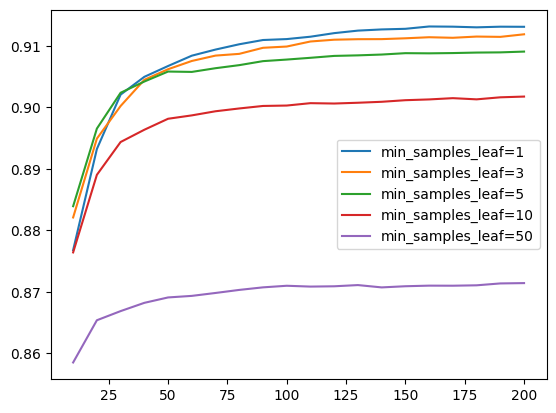

In [ ]:
values = [1, 3, 5, 10, 50]

for s in values:
    df_subset = df_scores[df_scores.min_samples_leaf == s]

    plt.plot(df_subset.n_estimators, df_subset.auc,
             label='min_samples_leaf=%d' % s)

plt.legend()

In [ ]:
min_samples_leaf = 1

In [ ]:
# Mencetak seluruh nilai n yang dihasilkan beserta AUC-nya
for s, n, auc in scores:
    print(f"min_samples_leaf: {s}, n_estimators: {n}, AUC: {auc:.4f}")

# Untuk mencetak hasil terbaik
best_params = max(scores, key=lambda x: x[2])
print(f"Best min_samples_leaf: {best_params[0]}, Best n_estimators: {best_params[1]}, Best ROC AUC Score: {best_params[2]:.4f}")

min_samples_leaf: 1, n_estimators: 10, AUC: 0.8768
min_samples_leaf: 1, n_estimators: 20, AUC: 0.8932
min_samples_leaf: 1, n_estimators: 30, AUC: 0.9021
min_samples_leaf: 1, n_estimators: 40, AUC: 0.9050
min_samples_leaf: 1, n_estimators: 50, AUC: 0.9067
min_samples_leaf: 1, n_estimators: 60, AUC: 0.9084
min_samples_leaf: 1, n_estimators: 70, AUC: 0.9094
min_samples_leaf: 1, n_estimators: 80, AUC: 0.9103
min_samples_leaf: 1, n_estimators: 90, AUC: 0.9110
min_samples_leaf: 1, n_estimators: 100, AUC: 0.9111
min_samples_leaf: 1, n_estimators: 110, AUC: 0.9115
min_samples_leaf: 1, n_estimators: 120, AUC: 0.9121
min_samples_leaf: 1, n_estimators: 130, AUC: 0.9125
min_samples_leaf: 1, n_estimators: 140, AUC: 0.9127
min_samples_leaf: 1, n_estimators: 150, AUC: 0.9128
min_samples_leaf: 1, n_estimators: 160, AUC: 0.9132
min_samples_leaf: 1, n_estimators: 170, AUC: 0.9131
min_samples_leaf: 1, n_estimators: 180, AUC: 0.9130
min_samples_leaf: 1, n_estimators: 190, AUC: 0.9131
min_samples_leaf: 1, 

In [ ]:
model = RandomForestClassifier(n_estimators=160,
                            max_depth=max_depth,
                            min_samples_leaf=min_samples_leaf,
                            random_state=1)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, n_estimators=160, random_state=1)

In [ ]:
y_pred = model.predict_proba(X_val)
roc_auc_score(y_val, y_pred, multi_class='ovr')

0.9131763060344013

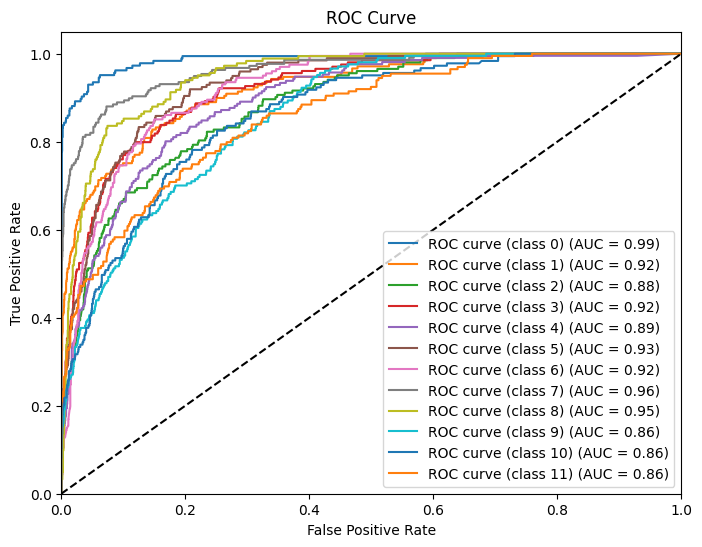

Mean ROC AUC Score: 0.9131763060344013


In [ ]:
from sklearn.metrics import roc_curve, auc
# import matplotlib.pyplot as plt
# Menghitung kurva ROC untuk setiap kelas
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(12):
    fpr[i], tpr[i], _ = roc_curve(y_val == i, y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot kurva ROC untuk setiap kelas
plt.figure(figsize=(8, 6))
for i in range(12):
    plt.plot(fpr[i], tpr[i], label='ROC curve (class {}) (AUC = {:.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
# plt.savefig(r'/content/drive/MyDrive/Colab Notebooks/dataset/roc_setelah.jpg')
plt.show()

mean_roc_auc = np.mean(list(roc_auc.values()))
print("Mean ROC AUC Score:", mean_roc_auc)

In [ ]:
df_train_full.head()

,duration_ms,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,valence,time_signature,genre
64590,150412,0.569,0.489,-5.594,0,0.0400,0.238,0.000,0.543,4,jazz
20901,180000,0.638,0.717,-4.722,1,0.0337,0.346,0.000,0.249,4,dance
25461,208840,0.595,0.921,-7.329,1,0.0987,0.179,0.000,0.937,4,disco
64895,227920,0.334,0.470,-12.588,0,0.0322,0.941,0.967,0.623,4,jazz
16043,311786,0.164,0.167,-17.032,0,0.0440,0.594,0.368,0.154,3,classical


In [ ]:
df_train_full = df_train_full.reset_index(drop=True)

In [ ]:
df_train_full.head()

,duration_ms,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,valence,time_signature,genre
0,150412,0.569,0.489,-5.594,0,0.0400,0.238,0.000,0.543,4,jazz
1,180000,0.638,0.717,-4.722,1,0.0337,0.346,0.000,0.249,4,dance
2,208840,0.595,0.921,-7.329,1,0.0987,0.179,0.000,0.937,4,disco
3,227920,0.334,0.470,-12.588,0,0.0322,0.941,0.967,0.623,4,jazz
4,311786,0.164,0.167,-17.032,0,0.0440,0.594,0.368,0.154,3,classical


In [ ]:
y_train_full = df_train_full.genre.values

In [ ]:
del df_train_full['genre']

In [ ]:
dicts_train_full = df_train_full.to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_train_full = dv.fit_transform(dicts_train_full)

dicts_test = df_test.to_dict(orient='records')
X_test = dv.transform(dicts_test)

print(X_test)

[[7.33000e-01 5.79000e-01 1.31733e+05 ... 5.13000e-02 4.00000e+00
  8.36000e-01]
 [2.23000e-04 5.70000e-01 2.74480e+05 ... 2.78000e-02 4.00000e+00
  4.76000e-01]
 [2.32000e-01 4.69000e-01 2.83000e+05 ... 3.26000e-02 4.00000e+00
  5.29000e-01]
 ...
 [7.89000e-02 8.12000e-01 1.92477e+05 ... 5.54000e-02 4.00000e+00
  5.73000e-01]
 [5.55000e-01 3.69000e-01 2.28013e+05 ... 4.00000e-02 3.00000e+00
  1.48000e-01]
 [3.69000e-02 6.53000e-01 2.16281e+05 ... 6.85000e-02 4.00000e+00
  6.69000e-01]]


In [ ]:
le = LabelEncoder()
y_train_full = le.fit_transform(y_train_full)

In [ ]:
model = RandomForestClassifier(n_estimators=125,
                            max_depth=15,
                            min_samples_leaf=1,
                            random_state=1)
model.fit(X_train_full, y_train_full)

RandomForestClassifier(max_depth=15, n_estimators=125, random_state=1)

In [ ]:
y_pred = model.predict_proba(X_test)
roc_auc_score(y_test, y_pred, multi_class='ovr')

0.9165901361020302

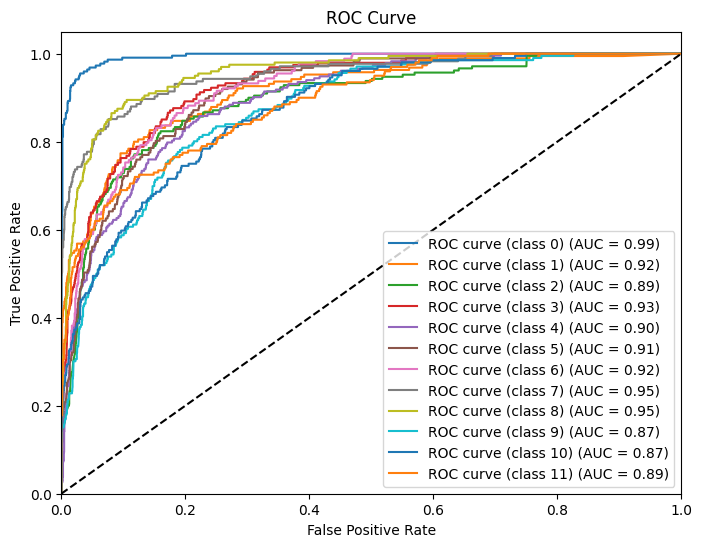

Mean ROC AUC Score: 0.9165901361020302


In [ ]:
# from sklearn.metrics import roc_curve, auc
# import matplotlib.pyplot as plt

# Menghitung kurva ROC untuk setiap kelas
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(12):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot kurva ROC untuk setiap kelas
plt.figure(figsize=(8, 6))
for i in range(12):
    plt.plot(fpr[i], tpr[i], label='ROC curve (class {}) (AUC = {:.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
# plt.savefig(r'/content/drive/MyDrive/Colab Notebooks/dataset/roc_evaluasi.jpg')
plt.show()

mean_roc_auc = np.mean(list(roc_auc.values()))
print("Mean ROC AUC Score:", mean_roc_auc)

In [ ]:
save_model(model,"model_rf.pkl")

Model is pickled as model/model_rf.pkl
